# import cell


In [1]:
# import tensorflow panda numpy and all i need
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
#from keras import plot model
from sklearn.preprocessing import LabelEncoder

from keras.utils import plot_model



## usefull functions



In [70]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

def format_data_time_step(data, time_step):
    """
    Format time-series data into a format suitable for training a recurrent neural network.

    Parameters
    ----------
    data : pd.DataFrame
        DataFrame containing the time-series data. The DataFrame should contain a 'label' column
        and one or more feature columns.

    time_step : int
        The number of time steps (i.e., rows) to include in each sample.

    Returns
    -------
    tuple
        A tuple containing the following six elements in the order given:

        train_data : numpy.ndarray
            An array of shape (n_samples_train, time_step, n_features) containing the training data.

        train_labels : numpy.ndarray
            An array of shape (n_samples_train,) containing the training labels.

        val_data : numpy.ndarray
            An array of shape (n_samples_val, time_step, n_features) containing the validation data.

        val_labels : numpy.ndarray
            An array of shape (n_samples_val,) containing the validation labels.

        test_data : numpy.ndarray
            An array of shape (n_samples_test, time_step, n_features) containing the test data.

        test_labels : numpy.ndarray
            An array of shape (n_samples_test,) containing the test labels.

    Notes
    -----
    This function splits the data into training, validation, and test sets and reshapes the data into
    samples of length `time_step`. The training set includes the first 60% of the data, the validation
    set includes the next 15%, and the test set includes the final 25%.
    """
    # Initialize a label encoder
    le = LabelEncoder()

    # Encode the labels
    data['label'] = le.fit_transform(data['label'])

    # Get the number of features
    n_features = len(data.columns) - 1

    # Get the number of samples in each set
    n_samples = len(data)
    n_samples_train = int(n_samples * 0.6)
    n_samples_val = int(n_samples * 0.15)
    n_samples_test = n_samples - n_samples_train - n_samples_val

    # Split the data into training, validation, and test sets
    train_data = data.iloc[:n_samples_train, :-1].values
    train_labels = data.iloc[:n_samples_train, -1].values
    val_data = data.iloc[n_samples_train:n_samples_train + n_samples_val, :-1].values

    val_labels = data.iloc[n_samples_train:n_samples_train + n_samples_val, -1].values
    test_data = data.iloc[n_samples_train + n_samples_val:, :-1].values
    test_labels = data.iloc[n_samples_train + n_samples_val:, -1].values

    # Reshape the data into samples of length `time_step`
    train_data = np.array([train_data[i:i + time_step] for i in range(n_samples_train - time_step + 1)])
    train_labels = np.array([train_labels[i + time_step - 1] for i in range(n_samples_train - time_step + 1)])
    val_data = np.array([val_data[i:i + time_step] for i in range(n_samples_val - time_step + 1)])
    val_labels = np.array([val_labels[i + time_step - 1] for i in range(n_samples_val - time_step + 1)])
    test_data = np.array([test_data[i:i + time_step] for i in range(n_samples_test - time_step + 1)])
    test_labels = np.array([test_labels[i + time_step - 1] for i in range(n_samples_test - time_step + 1)])

    return train_data, train_labels, val_data, val_labels, test_data, test_labels, le, n_features



In [66]:



def plot_confusion_matrix(model, test_data, test_labels, label_encoder, model_name):
    import itertools
    import numpy as np
    import pandas as pd
    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    # Predict probabilities
    y_pred_prob = model.predict(test_data)

    # Convert probabilities to predicted labels
    y_pred_labels = np.argmax(y_pred_prob, axis=1)

    # Generate confusion matrix
    cm = confusion_matrix(test_labels, y_pred_labels)

    # Normalize the confusion matrix
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Create a DataFrame from the confusion matrix using the label names
    cm_df = pd.DataFrame(cm_norm, columns=label_encoder.classes_, index=label_encoder.classes_)

    # Plot the confusion matrix using seaborn
    plt.figure(figsize=(40, 40))
    sns.heatmap(cm_df, annot=True, fmt='.4f')  # Display values with four decimals
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    # plot with the name of the model
    plt.title(f'Normalized Confusion Matrix for {model_name}')

# Example usage:
# plot_confusion_matrix(model_cnn_bigger, X_test, y_test, le, 'Large Model')


import plotly.graph_objects as go

def plot_confusion_matrix_plotly(model, test_data, test_labels, label_encoder, model_name):
    import numpy as np
    from sklearn.metrics import confusion_matrix

    # Predict probabilities
    y_pred_prob = model.predict(test_data)

    # Convert probabilities to predicted labels
    y_pred_labels = np.argmax(y_pred_prob, axis=1)

    # Generate confusion matrix
    cm = confusion_matrix(test_labels, y_pred_labels)

    # Normalize the confusion matrix
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Create a DataFrame from the confusion matrix using the label names
    cm_df = pd.DataFrame(cm_norm, columns=label_encoder.classes_, index=label_encoder.classes_)

    # Convert DataFrame to a Plotly heatmap
    fig = go.Figure(data=go.Heatmap(z=cm_df.values,
                                    x=cm_df.columns,
                                    y=cm_df.index,
                                    hoverongaps=False,
                                    colorscale='Viridis'))

    # Customize the layout
    fig.update_layout(title=f'Normalized Confusion Matrix for {model_name}',
                      xaxis_title='Predicted label',
                      yaxis_title='True label')

    # save the plot in jpg
    fig.write_image(f'{model_name}.jpg')

    
    # Show the plot
    fig.show()

# Example usage:
# plot_confusion_matrix_plotly(model_cnn_bigger, X_test, y_test, le, 'Large M


# load dataset and visualisation

In [7]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the path to your dataset folder
folder_path = 'CICIoT2023/'

# Get a list of file paths ending with '.csv' in the specified folder
file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

# Randomly select ten files
selected_files = random.sample(file_paths, 10)

# Load selected datasets and concatenate them into a single dataframe
merged_df = pd.concat([pd.read_csv(file) for file in selected_files], ignore_index=True)


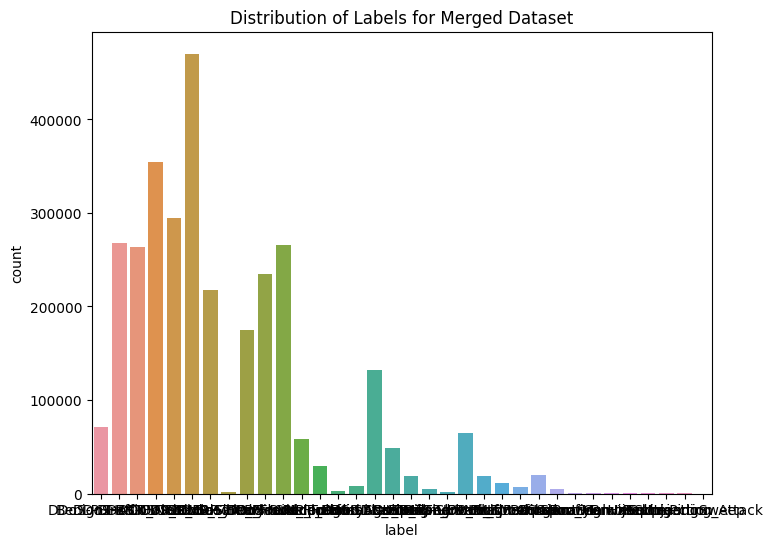

DDoS-ICMP_Flood            470357
DDoS-UDP_Flood             354031
DDoS-TCP_Flood             294199
DDoS-PSHACK_Flood          267586
DDoS-SYN_Flood             265268
DDoS-RSTFINFlood           263796
DDoS-SynonymousIP_Flood    234908
DoS-UDP_Flood              217282
DoS-TCP_Flood              174798
DoS-SYN_Flood              132189
BenignTraffic               71487
Mirai-greeth_flood          65059
Mirai-udpplain              58387
Mirai-greip_flood           48875
DDoS-ICMP_Fragmentation     29584
MITM-ArpSpoofing            20011
DDoS-UDP_Fragmentation      18679
DDoS-ACK_Fragmentation      18361
DNS_Spoofing                11652
Recon-HostDiscovery          8509
Recon-OSScan                 6536
Recon-PortScan               5225
DoS-HTTP_Flood               4642
VulnerabilityScan            2389
DDoS-HTTP_Flood              1849
DDoS-SlowLoris               1522
DictionaryBruteForce          895
BrowserHijacking              366
SqlInjection                  355
CommandInjecti

In [8]:
X = merged_df.drop('label', axis=1)
y = merged_df['label']

# Plot the distribution of the label column for the merged dataset
plt.figure(figsize=(8, 6))
sns.countplot(x=y)  # Replace 'label_column' with the actual name of your label column
plt.title('Distribution of Labels for Merged Dataset')
plt.show()


# print distribution of label
print(y.value_counts())



In [9]:
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
X = scaler.fit_transform(X)


In [10]:
# make train val test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, random_state=42, test_size=0.2)

# transform string labels to numbers
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)






In [11]:
input_shape_cnn = (X_train.shape[1], 1)
num_labels = len(np.unique(y_train))

In [12]:
# cnn model FOR NETWORK TRAFFIC
model_cnn = keras.Sequential([
    keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=input_shape_cnn),
    keras.layers.MaxPooling1D(pool_size=4),
    # dropout layer
    # keras.layers.Dropout(0.5),
    keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=4),
    # dropout layer
    # keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(50, activation='relu'),
    # dropout layer
    # keras.layers.Dropout(0.5)
    keras.layers.Dense(num_labels, activation='softmax')
])

model_cnn.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


In [13]:


model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 44, 128)           512       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 11, 128)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 9, 128)            49280     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 2, 128)           0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 50)                1

In [95]:
model_cnn.fit(X_train, y_train, epochs=5,batch_size=256, validation_data=(X_val, y_val))

model_cnn.evaluate(X_test, y_test)

Epoch 1/10
33476/33476 [==============================] - 182s 5ms/step - loss: 0.1419 - accuracy: 0.9478 - val_loss: 0.0641 - val_accuracy: 0.9818
Epoch 2/10
33476/33476 [==============================] - 160s 5ms/step - loss: 0.0605 - accuracy: 0.9808 - val_loss: 0.0603 - val_accuracy: 0.9825
Epoch 3/10
 8010/33476 [======>.......................] - ETA: 2:34 - loss: 0.0570 - accuracy: 0.9817

KeyboardInterrupt: 

In [96]:
model_cnn.evaluate(X_test, y_test)

83690/83690 [==============================] - 251s 3ms/step - loss: 0.0583 - accuracy: 0.9813


[0.05827369540929794, 0.9812727570533752]

83690/83690 [==============================] - 185s 2ms/step


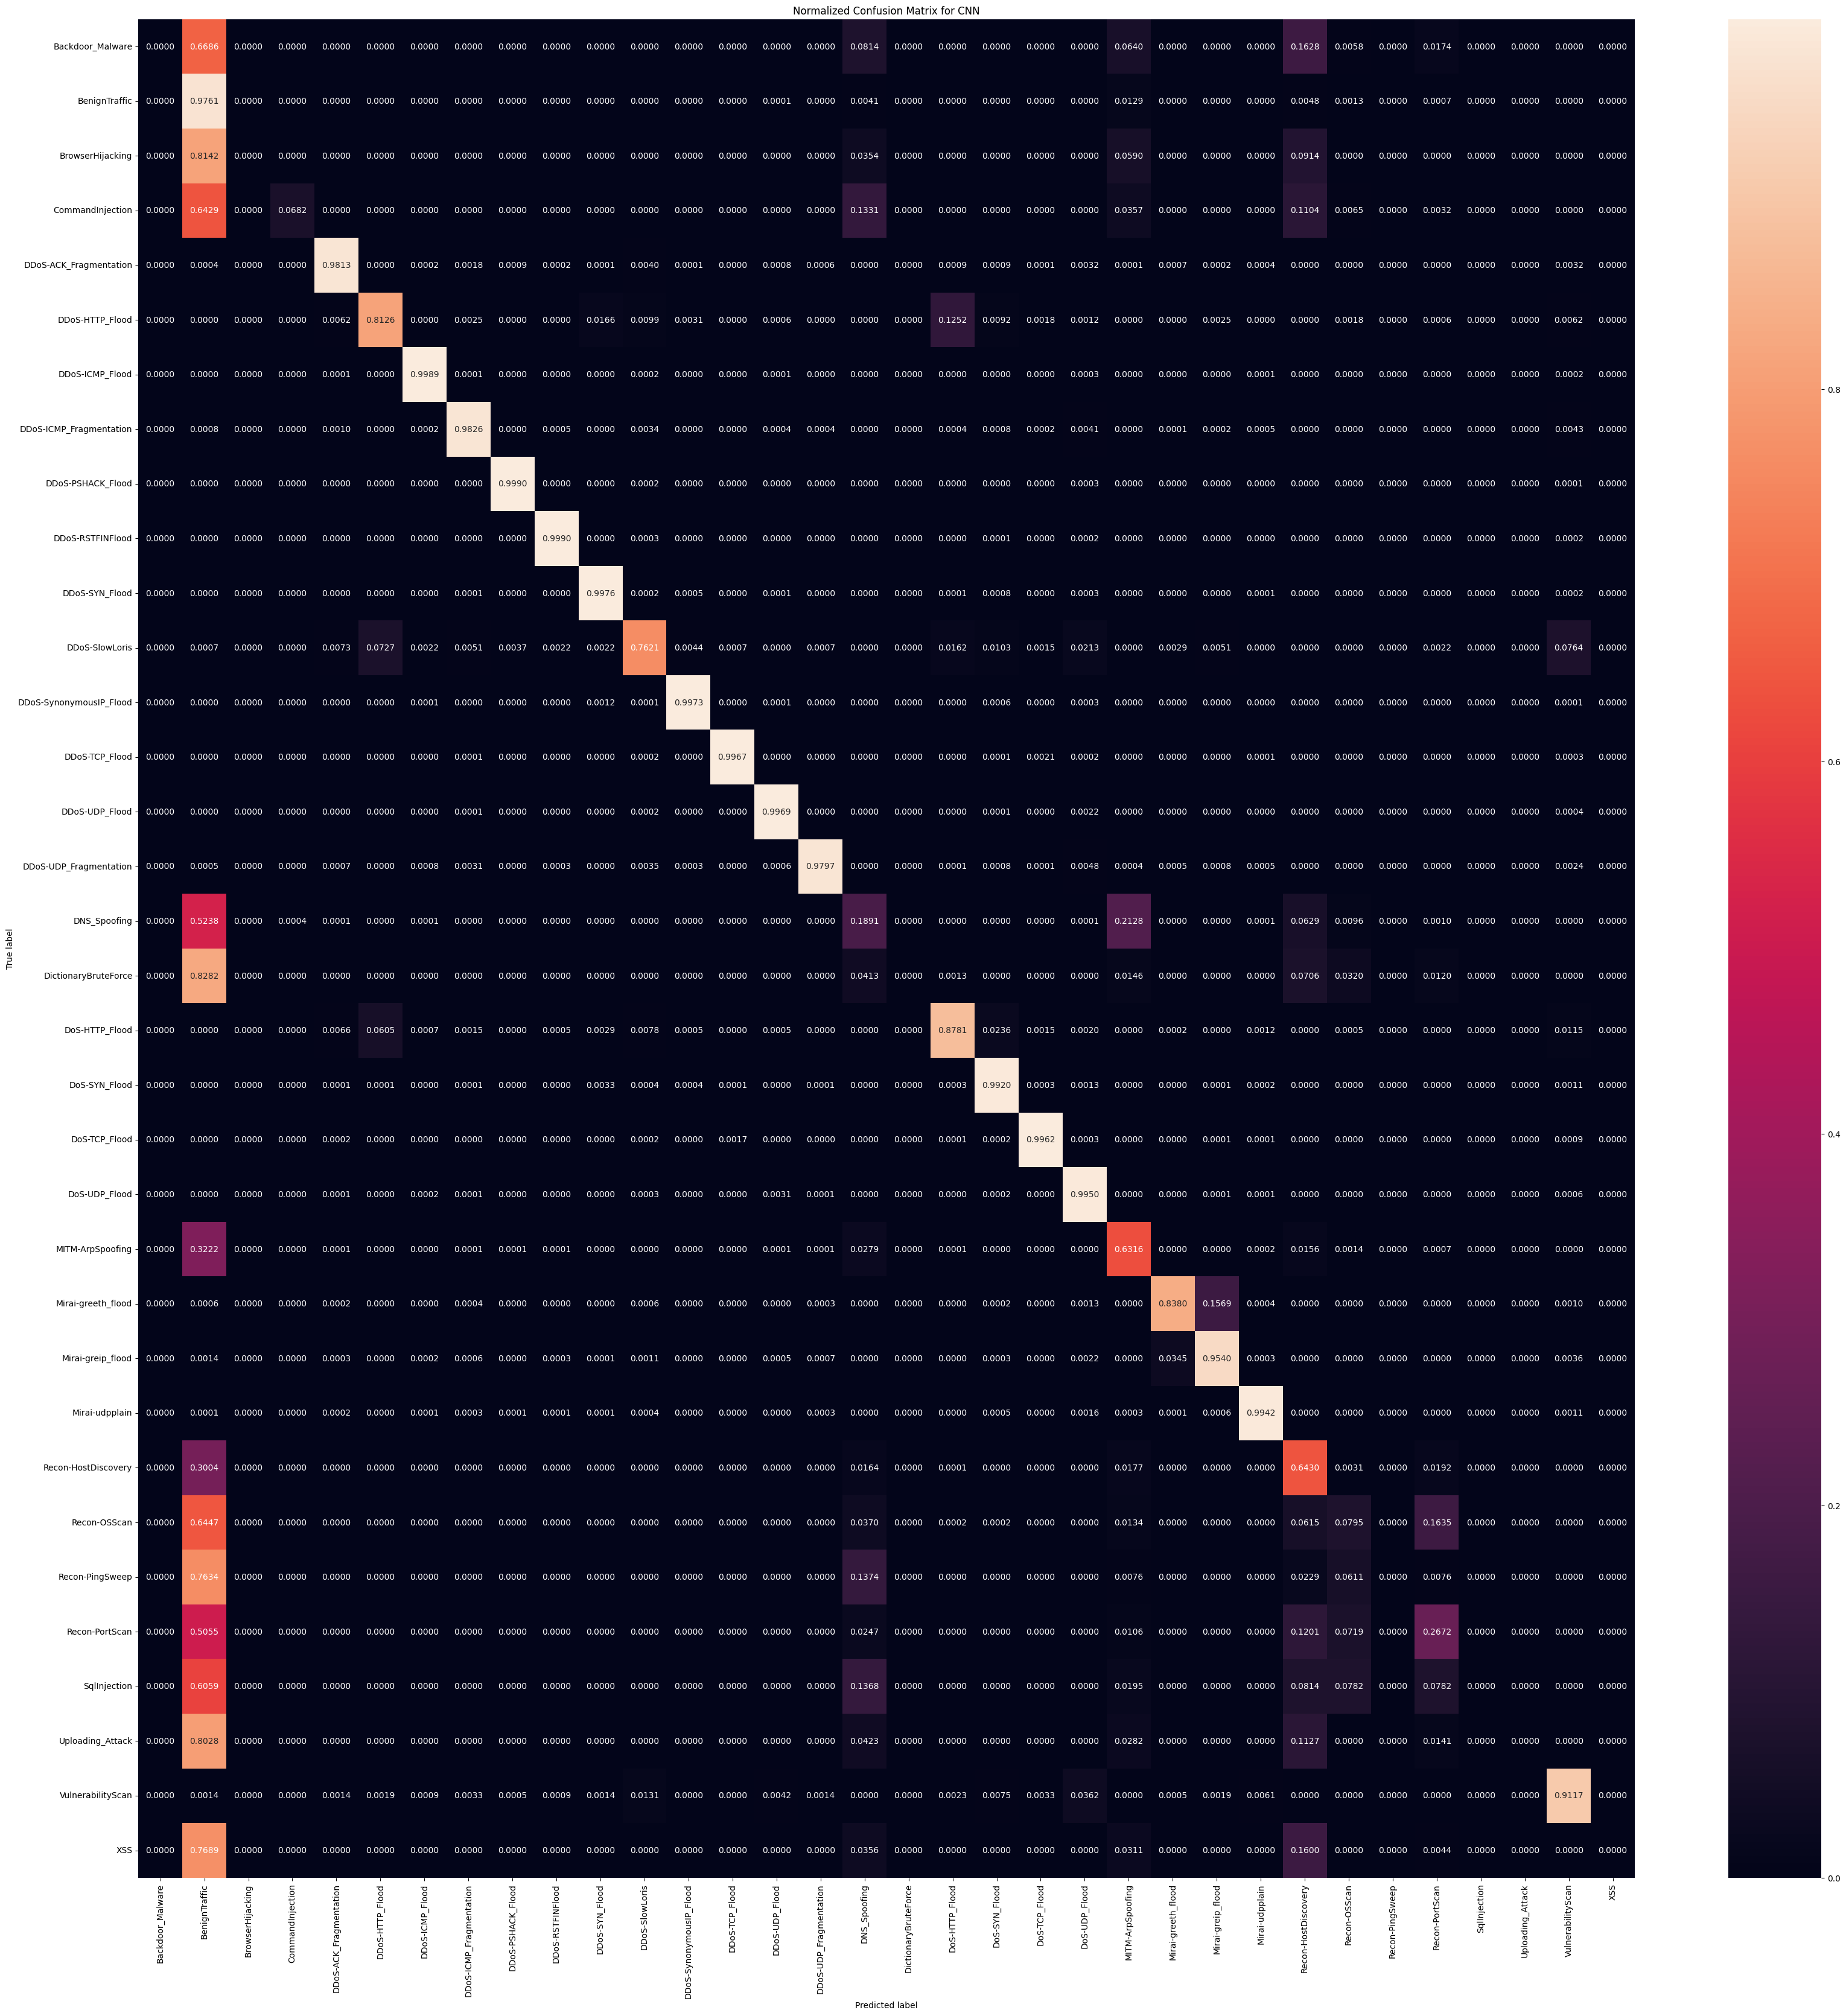

In [105]:
plot_confusion_matrix(model_cnn, X_test, y_test, le, 'CNN')

In [112]:
# free gpu memory
import gc
gc.collect()
tf.keras.backend.clear_session()


In [113]:
# Assuming X_train has a shape (num_samples, num_features)
input_shape_cnn_big = (X_train.shape[1], 1)

model_cnn_big = keras.Sequential([
    keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=input_shape_cnn_big),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Dropout(0.2),

    keras.layers.Conv1D(filters=512, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(num_labels, activation='softmax')
])

model_cnn_big.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])


In [114]:
history_cnn_big = model_cnn_big.fit(X_train, y_train, epochs=5, batch_size=256, validation_data=(X_val, y_val))

Epoch 1/5
33476/33476 [==============================] - 218s 6ms/step - loss: 0.1334 - accuracy: 0.9496 - val_loss: 0.0578 - val_accuracy: 0.9812
Epoch 2/5
33476/33476 [==============================] - 211s 6ms/step - loss: 0.0727 - accuracy: 0.9776 - val_loss: 0.0517 - val_accuracy: 0.9821
Epoch 3/5
33476/33476 [==============================] - 209s 6ms/step - loss: 0.0639 - accuracy: 0.9808 - val_loss: 0.0456 - val_accuracy: 0.9850
Epoch 4/5
33476/33476 [==============================] - 209s 6ms/step - loss: 0.0648 - accuracy: 0.9819 - val_loss: 0.0454 - val_accuracy: 0.9852
Epoch 5/5
33476/33476 [==============================] - 232s 7ms/step - loss: 0.0625 - accuracy: 0.9824 - val_loss: 0.0453 - val_accuracy: 0.9849


In [115]:
model_cnn_big.evaluate(X_test, y_test)

83690/83690 [==============================] - 308s 4ms/step - loss: 0.0450 - accuracy: 0.9850


[0.044976286590099335, 0.985019862651825]

83690/83690 [==============================] - 164s 2ms/step


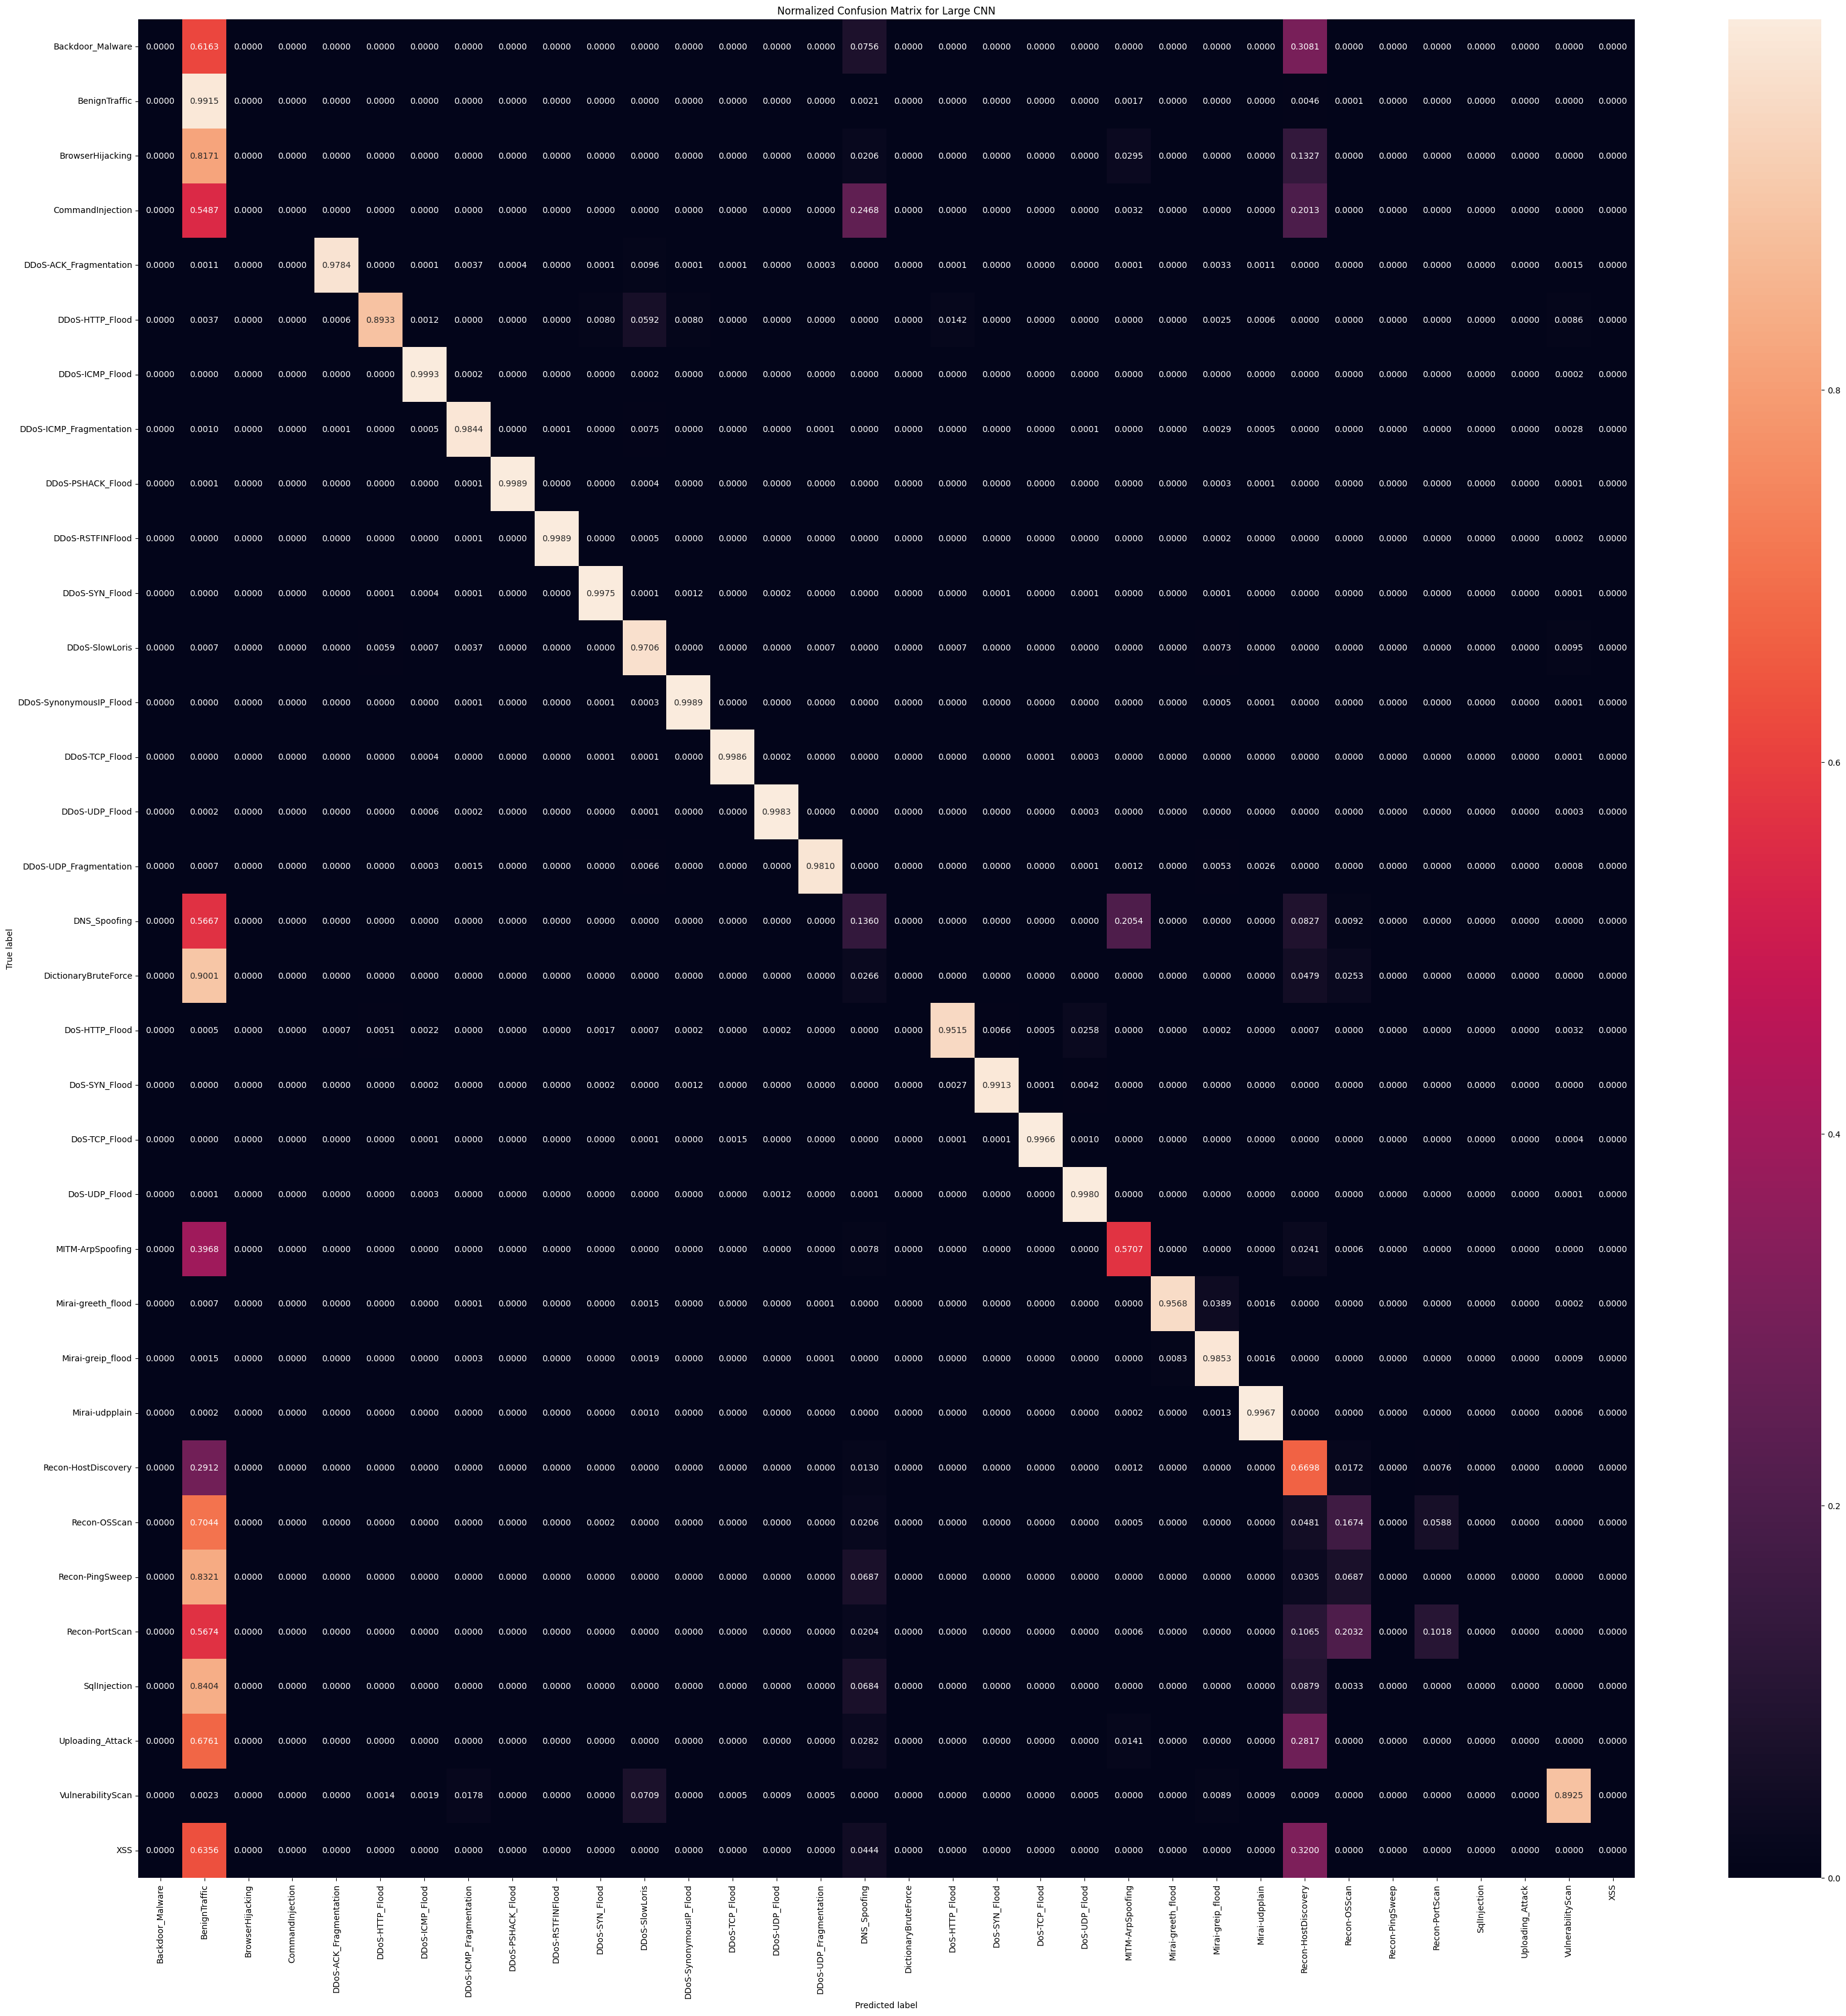

In [116]:
plot_confusion_matrix(model_cnn_big, X_test, y_test, le, 'Large CNN')



In [71]:
#format in time step 5
time_step = 5
train_data, train_labels, val_data, val_labels, test_data, test_labels,le = format_data_time_step(merged_df, time_step)


ValueError: y should be a 1d array, got an array of shape (3049772, 2) instead.

In [ ]:
input_shape_lstm = (train_data.shape[1], train_data.shape[2])
num_labels = len(np.unique(train_labels))
model_lstm = keras.Sequential([
    keras.layers.LSTM(64, input_shape=input_shape_lstm),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(num_labels, activation='softmax')
])

model_lstm.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                28416     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 34)                1122      
                                                                 
Total params: 31,618
Trainable params: 31,618
Non-trainable params: 0
_________________________________________________________________


In [10]:
import gc
import tensorflow as tf

# # Clear GPU memory
# gc.collect()
# tf.keras.backend.clear_session()

# only keep  50% of the data
train_data = train_data[:int(len(train_data)*0.5)]
train_labels = train_labels[:int(len(train_labels)*0.5)]

val_data = val_data[:int(len(val_data)*0.5)]
val_labels = val_labels[:int(len(val_labels)*0.5)]

test_data = test_data[:int(len(test_data)*0.5)]
test_labels = test_labels[:int(len(test_labels)*0.5)]

history_lstm = model_lstm.fit(train_data, train_labels, epochs=5, validation_data=(val_data, val_labels))

Epoch 1/5
 30951/129536 [======>.......................] - ETA: 8:27 - loss: 1.9057 - accuracy: 0.2303

KeyboardInterrupt: 

## Classfications 8 classes 

In [16]:
dict_7classes = {}
dict_7classes['DDoS-RSTFINFlood'] = 'DDoS'
dict_7classes['DDoS-PSHACK_Flood'] = 'DDoS'
dict_7classes['DDoS-SYN_Flood'] = 'DDoS'
dict_7classes['DDoS-UDP_Flood'] = 'DDoS'
dict_7classes['DDoS-TCP_Flood'] = 'DDoS'
dict_7classes['DDoS-ICMP_Flood'] = 'DDoS'
dict_7classes['DDoS-SynonymousIP_Flood'] = 'DDoS'
dict_7classes['DDoS-ACK_Fragmentation'] = 'DDoS'
dict_7classes['DDoS-UDP_Fragmentation'] = 'DDoS'
dict_7classes['DDoS-ICMP_Fragmentation'] = 'DDoS'
dict_7classes['DDoS-SlowLoris'] = 'DDoS'
dict_7classes['DDoS-HTTP_Flood'] = 'DDoS'

dict_7classes['DoS-UDP_Flood'] = 'DoS'
dict_7classes['DoS-SYN_Flood'] = 'DoS'
dict_7classes['DoS-TCP_Flood'] = 'DoS'
dict_7classes['DoS-HTTP_Flood'] = 'DoS'


dict_7classes['Mirai-greeth_flood'] = 'Mirai'
dict_7classes['Mirai-greip_flood'] = 'Mirai'
dict_7classes['Mirai-udpplain'] = 'Mirai'

dict_7classes['Recon-PingSweep'] = 'Recon'
dict_7classes['Recon-OSScan'] = 'Recon'
dict_7classes['Recon-PortScan'] = 'Recon'
dict_7classes['VulnerabilityScan'] = 'Recon'
dict_7classes['Recon-HostDiscovery'] = 'Recon'

dict_7classes['DNS_Spoofing'] = 'Spoofing'
dict_7classes['MITM-ArpSpoofing'] = 'Spoofing'

dict_7classes['BenignTraffic'] = 'Benign'

dict_7classes['BrowserHijacking'] = 'Web'
dict_7classes['Backdoor_Malware'] = 'Web'
dict_7classes['XSS'] = 'Web'
dict_7classes['Uploading_Attack'] = 'Web'
dict_7classes['SqlInjection'] = 'Web'
dict_7classes['CommandInjection'] = 'Web'


dict_7classes['DictionaryBruteForce'] = 'BruteForce'

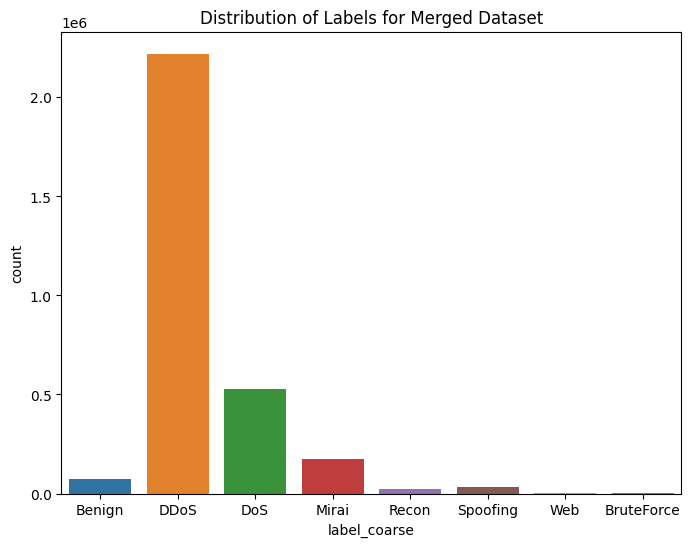

In [62]:
# Create a new column called 'label_coarse' that maps the 'label' column to the new labels
merged_df['label_coarse'] = merged_df['label'].map(dict_7classes)

# Plot the distribution of the label_coarse column for the merged dataset

plt.figure(figsize=(8, 6))
sns.countplot(x=merged_df['label_coarse'])
plt.title('Distribution of Labels for Merged Dataset')
plt.show()

# rename label_coarse to label
merged_df.rename(columns={'label_coarse': 'label'}, inplace=True)

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label',
       'label_coarse'],
      dtype='object')

In [18]:
# make train val test split
from sklearn.model_selection import train_test_split

X = merged_df.drop('label', axis=1)
y = merged_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, random_state=42, test_size=0.2)


# transform string labels to numbers
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)



In [19]:
# cnn
input_shape_cnn_7 = (X_train.shape[1], 1)
num_labels = len(np.unique(y_train))

model_cnn_7 = keras.Sequential([
    keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=input_shape_cnn_7),
    keras.layers.MaxPooling1D(pool_size=4),
    keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=4),
    keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(num_labels, activation='softmax')
])

model_cnn_7.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

model_cnn_7.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 44, 128)           512       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 11, 128)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 9, 128)            49280     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 2, 128)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 50)               

In [20]:
history_cnn_7 = model_cnn_7.fit(X_train, y_train, epochs=5,batch_size=256 ,validation_data=(X_val, y_val))


Epoch 1/5
7625/7625 [==============================] - 61s 4ms/step - loss: 0.2606 - accuracy: 0.8876 - val_loss: 0.0713 - val_accuracy: 0.9824
Epoch 2/5
7625/7625 [==============================] - 34s 4ms/step - loss: 0.0442 - accuracy: 0.9843 - val_loss: 0.0367 - val_accuracy: 0.9860
Epoch 3/5
7625/7625 [==============================] - 31s 4ms/step - loss: 0.0385 - accuracy: 0.9857 - val_loss: 0.0357 - val_accuracy: 0.9864
Epoch 4/5
7625/7625 [==============================] - 31s 4ms/step - loss: 0.0355 - accuracy: 0.9865 - val_loss: 0.0359 - val_accuracy: 0.9870
Epoch 5/5
7625/7625 [==============================] - 37s 5ms/step - loss: 0.0337 - accuracy: 0.9872 - val_loss: 0.0325 - val_accuracy: 0.9876


In [25]:
model_cnn_7.evaluate(X_test, y_test)

19062/19062 [==============================] - 49s 3ms/step - loss: 0.0326 - accuracy: 0.9874


[0.0325738750398159, 0.9873777627944946]

19062/19062 [==============================] - 32s 2ms/step


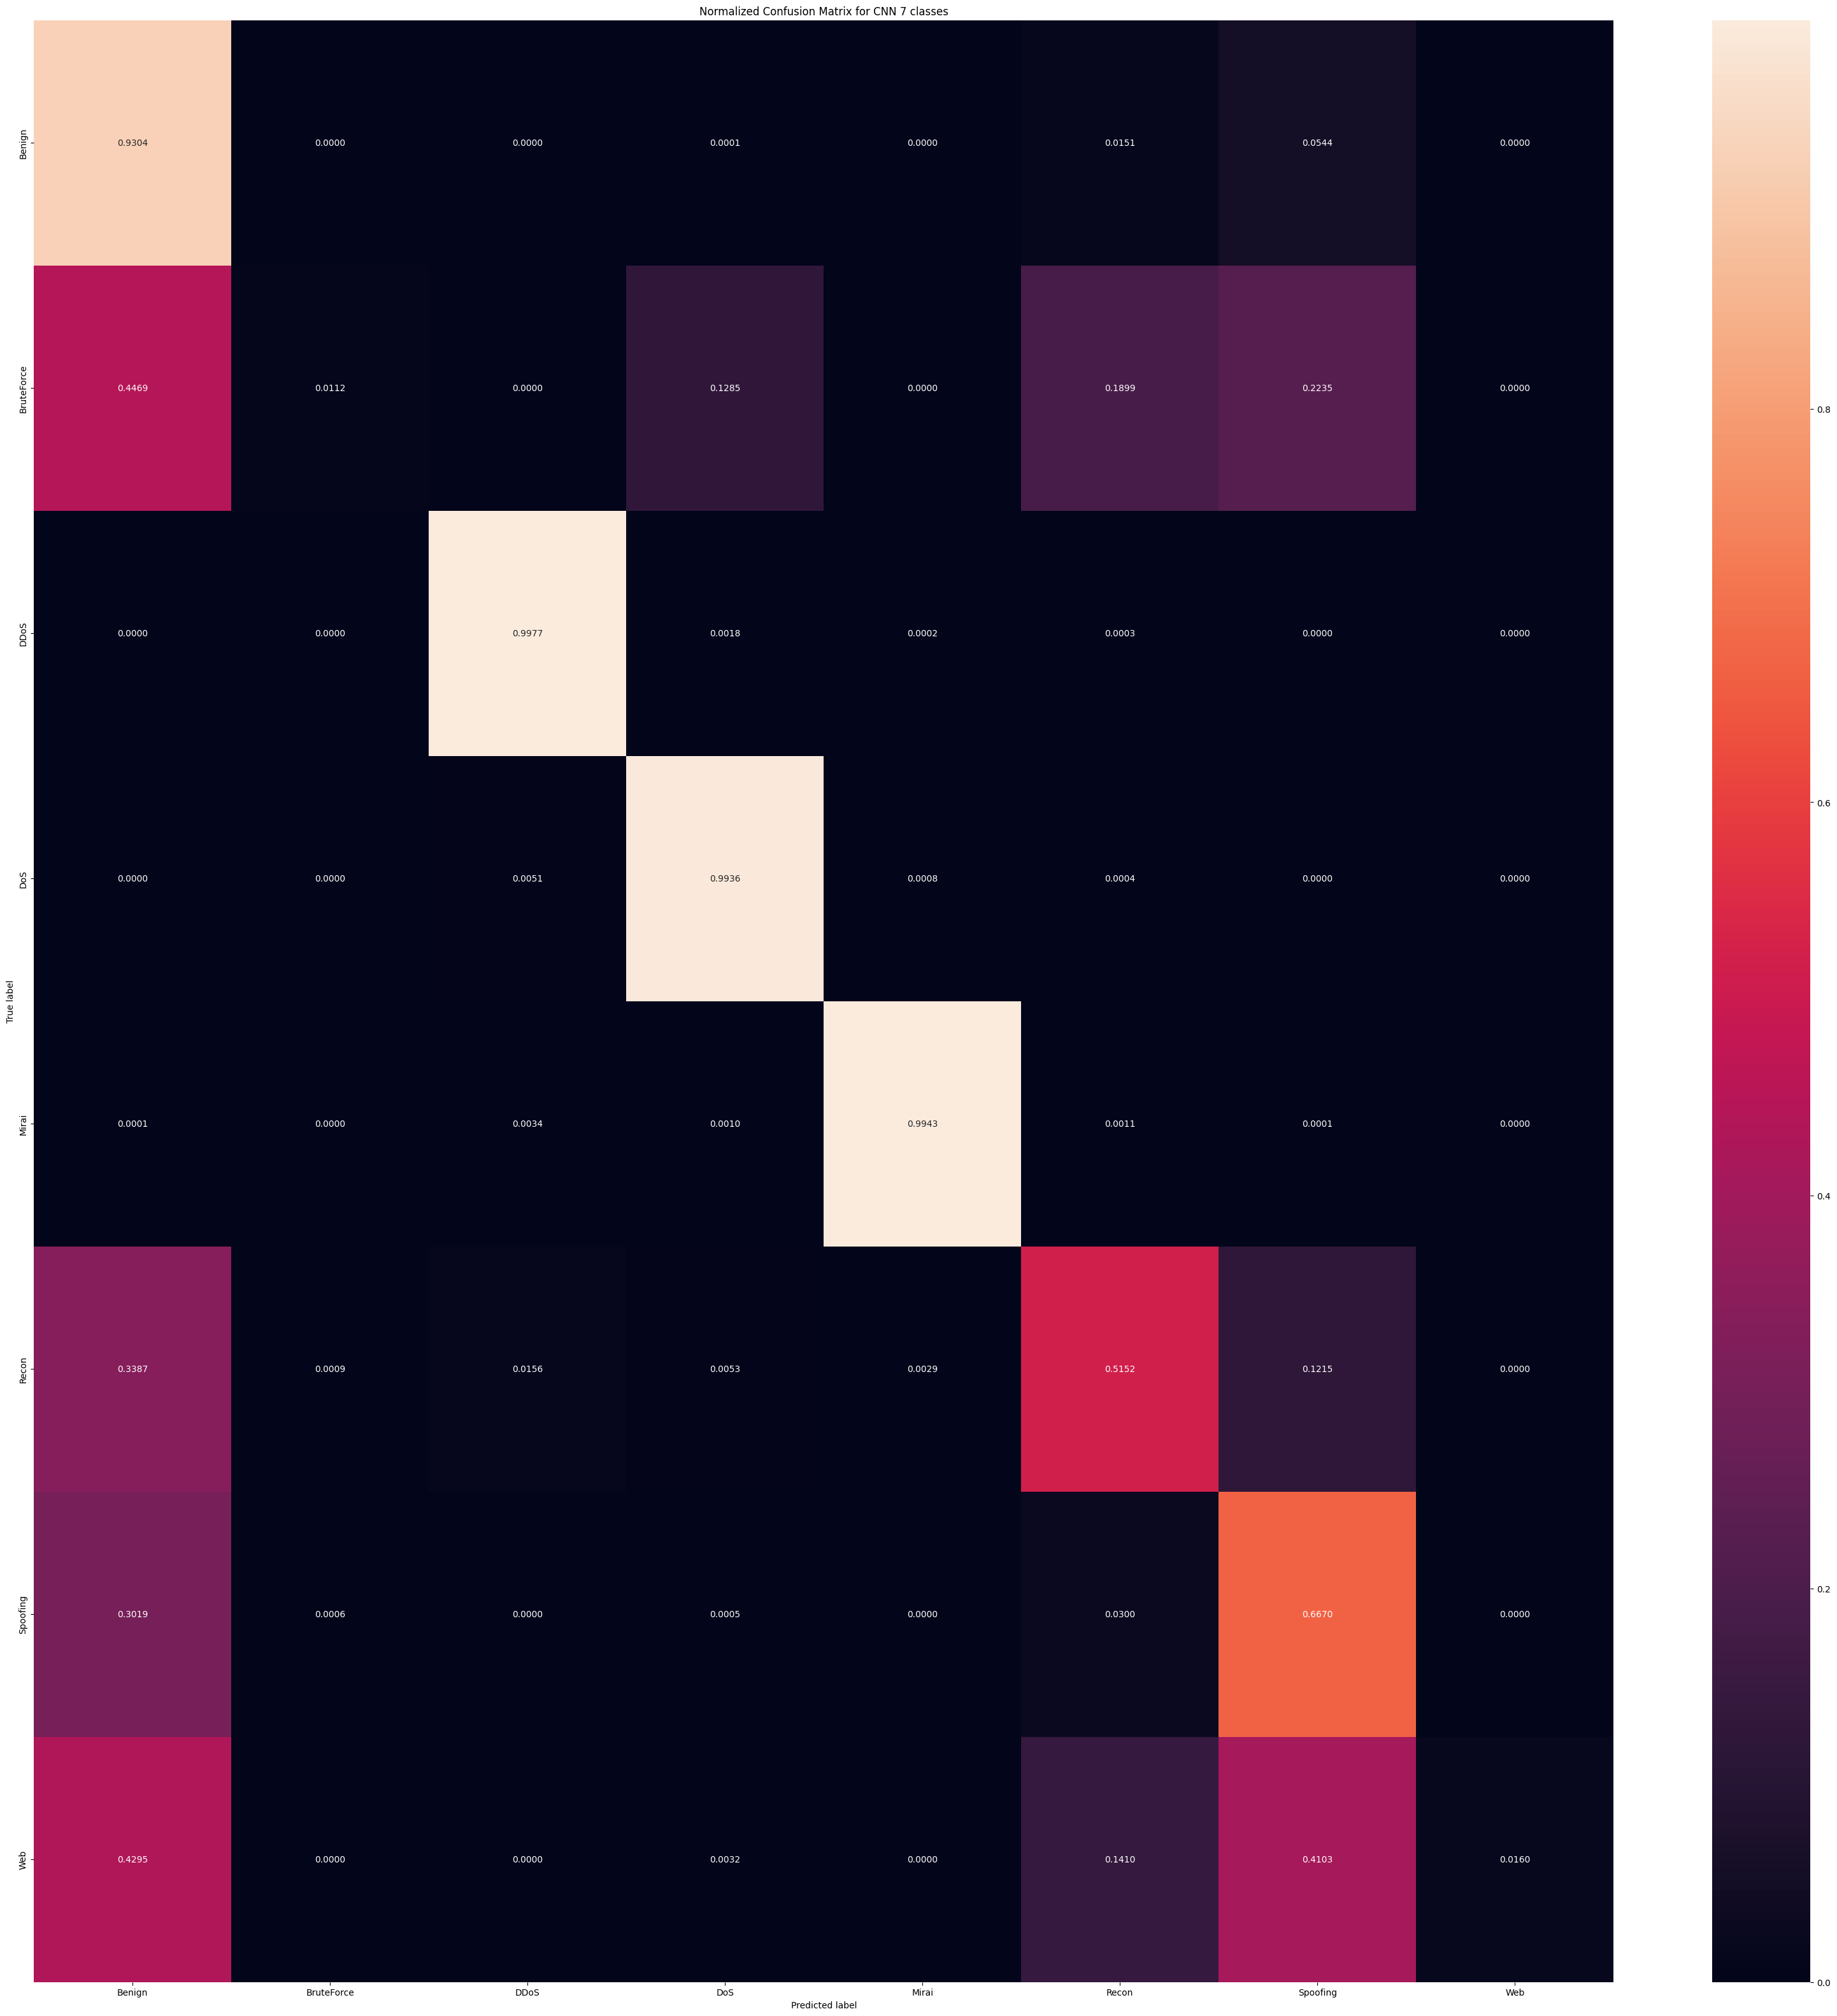

In [23]:
plot_confusion_matrix(model_cnn_7, X_test, y_test, le, 'CNN 7 classes')

In [69]:
time_step = 5

train_data_7, train_labels_7, val_data_7, val_labels_7, test_data_7, test_labels_7,le_7 =  format_data_time_step(merged_df, time_step)


ValueError: y should be a 1d array, got an array of shape (3049772, 2) instead.

In [57]:
input_shape_lstm_7 = (train_data_7.shape[1], train_data_7.shape[2])
num_labels = len(np.unique(train_labels_7))


In [58]:
model_lstm_7 = keras.Sequential([
    keras.layers.LSTM(64, input_shape=input_shape_lstm_7),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(num_labels, activation='softmax')
])

model_lstm_7.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

model_lstm_7.summary()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                28672     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 8)                 264       
                                                                 
Total params: 31,016
Trainable params: 31,016
Non-trainable params: 0
_________________________________________________________________


In [61]:

train_data_7 = train_data_7.astype(float)
val_data_7 = val_data_7.astype(float)

model_lstm_7.fit(train_data_7, train_labels_7, epochs=5, validation_data=(val_data_7, val_labels_7))

ValueError: could not convert string to float: 'BenignTraffic'